In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

In [2]:
config = OmegaConf.load("../conf/config.yaml")
config.doc2label_data = OmegaConf.load("../conf/doc2label_data/rsm.yaml")
config.doc2label_model = OmegaConf.load("../conf/doc2label_model/ensemble.yaml")

In [3]:
config.doc2label_data.label_path = "../data/data.csv"
config.doc2label_data.embedding_path = "../data/embedding_example/embedding_m100.csv"

In [4]:
dmf = DataModuleFactory(**config.doc2label_data)

2023-02-27 13:28:37.900 | INFO     | mofgraph2vec.data.datamodule:__init__:64 - Train: 2637 Valid: 294 Test: 326


In [5]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [38]:
model = pickle.load(open("../experiments/workflow/wandb/offline-run-20230227_143159-j4ejyi49/files/../tmp/best_model.pkl", 'rb'))

In [39]:
train_pred = model.predict(train_ds.vectors)
test_pred = model.predict(test_ds.vectors)

train_true = train_ds.labels.numpy()
test_true = test_ds.labels.numpy()

ValueError: Feature shape mismatch, expected: 400, got 500

Text(0, 0.5, 'Predicted $CO_2$ $logk_H$')

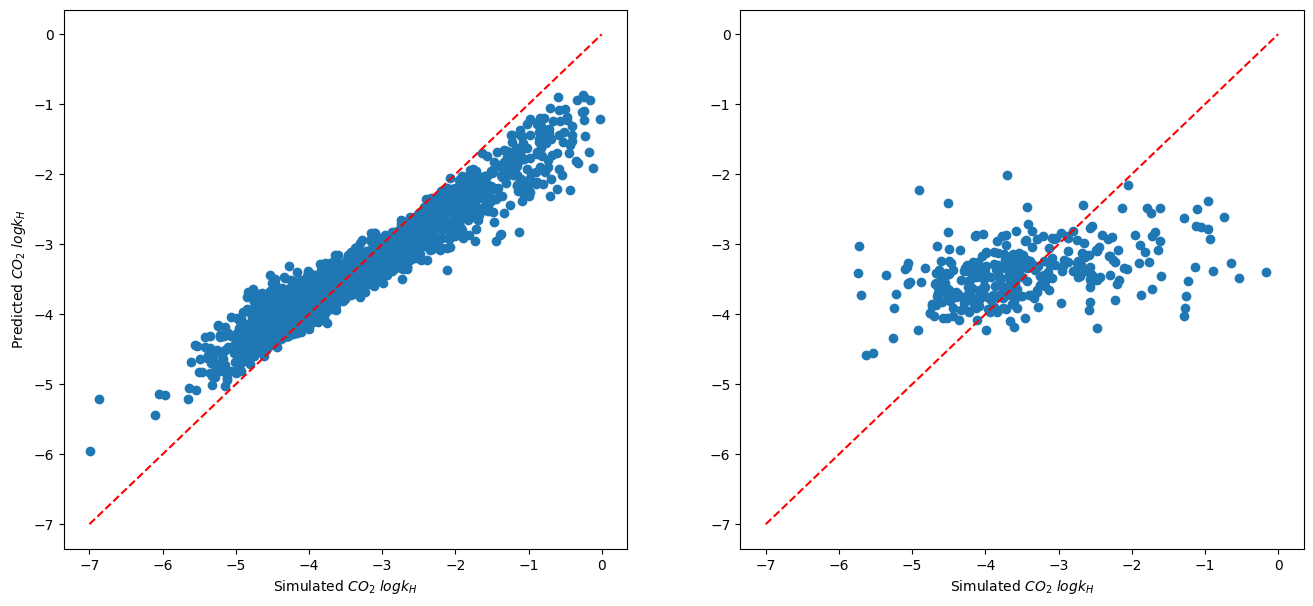

In [40]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,7)

ax[0].scatter(train_true, train_pred)
ax[0].plot([-7,0], [-7,0], "r--")

ax[1].scatter(test_true, test_pred)
ax[1].plot([-7,0], [-7,0], "r--")

ax[0].set_xlabel("Simulated $CO_2$ $logk_H$")
ax[1].set_xlabel("Simulated $CO_2$ $logk_H$")
ax[0].set_ylabel("Predicted $CO_2$ $logk_H$")

In [38]:
model.test(test_ds.vectors, test_ds.labels, dmf.target_transform)

{'test_mse': 0.20595019, 'test_mae': 0.3411733, 'test_r2': -16.064385502704756}